<a href="https://colab.research.google.com/github/abhishek4official/TensorFlowTest/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic of Numpy liberary

In [1]:
print("Hello World")

Hello World


In [2]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

Current array: ['Hello' 'World' '!']
Printing each element
Hello
World
!

Printing each element and their index
Index: 0, was: Hello
Index: 1, was: World
Index: 2, was: !


In [3]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))


Showing some basic math on arrays
Max: 4
Average: 2.0
Max index: 2


In [4]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))


You can print the type of anything
Type of b: <class 'numpy.ndarray'>, type of b[0]: <class 'numpy.int64'>


In [6]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)


Use numpy to create a [3,3] dimension array with random number
[[0.44951756 0.1055821  0.43788316]
 [0.14244655 0.38354827 0.08912164]
 [0.00763159 0.11277122 0.42972571]]


In [7]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")


You can print the dimensions of arrays
Shape of a: (3,)
Shape of b: (5,)
Shape of c: (3, 3)
...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists


In [8]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd


Doing $ls on filesystem
total 4
drwxr-xr-x 1 root root 4096 Apr  7 13:36 sample_data
/content


In [9]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy


Install numpy


# Celcius to Farenhight using ML



In [10]:
import tensorflow as tf

In [11]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Setting up data

In [12]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


**Some Machine Learning terminology**
***Feature ***— The input(s) to our model. In this case, a single value — the degrees in Celsius.

***Labels*** — The output our model predicts. In this case, a single value — the degrees in Fahrenheit.

***Example*** — A pair of inputs/outputs used during training. In our case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22,72).

## Creating model
Next, create the model. We will use the simplest possible model we can, a Dense network. Since the problem is straightforward, this network will require only a single layer, with a single neuron







### Build a layer Or Define a layer

We'll call the layer ***layer0*** and create it by instantiating tf.keras.layers.Dense with the following configuration:


*   input_shape=[1] — This specifies that the input to this layer is a 
single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.
*   units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)


In [13]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model
Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, layer0.

In [15]:
model = tf.keras.Sequential([layer0])


**Note**

You will often see the layers defined inside the model definition, rather than beforehand:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

### Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.

In [17]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

### Train the model

In [18]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


### Draw chart for Loss

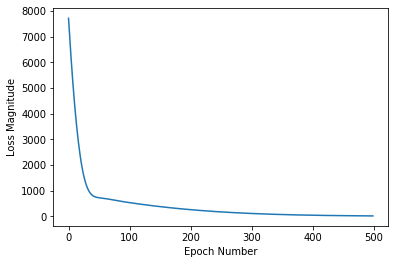

In [19]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

### Pridict value

In [20]:
print(model.predict([100.0]))

[[211.27974]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)


### Check layer Weights

In [22]:
print("These are the layer variables: {}".format(layer0.get_weights()))

These are the layer variables: [array([[1.8285518]], dtype=float32), array([28.424564], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula. We'll explain this in an upcoming video where we show how a Dense layer works, but for a single neuron with a single input and a single output, the internal math looks the same as [the equation for a line](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, which has the same form as the conversion equation, $f = 1.8c + 32$.

Since the form is the same, the variables should converge on the standard values of 1.8 and 32, which is exactly what happened.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

### A little experiment

Just for fun, what if we created more Dense layers with different units, which therefore also has more variables?

In [23]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74744]]
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.8639131 ,  0.05290692, -0.21759978,  0.5745072 ]],
      dtype=float32), array([-3.1724064, -2.8597019,  2.5401404,  3.063054 ], dtype=float32)]
These are the l1 variables: [array([[ 0.08315038,  0.71403164,  0.71292967,  0.48162803],
       [ 0.45626125,  0.9506956 ,  0.6201535 ,  0.19214895],
       [-0.19489388,  0.03659706, -0.7781201 ,  0.10927396],
       [-0.66928107, -0.12714736, -0.36883596,  0.5776847 ]],
      dtype=float32), array([-3.049262 , -3.123932 , -3.07609  ,  0.6080868], dtype=float32)]
These are the l2 variables: [array([[-1.1001765 ],
       [-0.8355052 ],
       [-1.3536568 ],
       [ 0.19320495]], dtype=float32), array([3.107515], dtype=float32)]
